# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

# Data Problem Definition:
Identify the key predictive factors that influence the sale price of used cars using a dataset of 426,000 vehicle records. Specifically, develop a regression model that explains the variation in sale price based on various attributes such as make, model, year, mileage, condition, and other relevant features. The goal is to extract insights on the relationships between these attributes and sale price, ultimately informing feature importance and driving business recommendations for the used car dealership.<br/>
Key Objectives:<br/>
<ul>
    <li>
Identify significant predictors of used car sale price.
    </li>
    <li>
Quantify the relationships between predictors and sale price.
    </li>
    <li>
Rank features by importance to inform business decisions.
    </li>
</ul>
Technical Requirements:<br/>
<ul>
    <li>
Data preprocessing and feature engineering
    </li>
    <li>
Regression modeling (e.g., linear, generalized linear, or tree-based)
    </li>
    <li>
Feature selection and importance analysis
    </li>
    <li>
Model evaluation and validation
    </li>
</ul> <br/>
This reframed definition provides a clear direction for the data analysis task, focusing on identifying key drivers of used car prices using regression modeling and feature importance analysis.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Data Understanding Steps
I will use the following steps to get familiar with the dataset and identify quality issues: <br/>
<ul>
<li>
Step 1: Initial Data Review
<ul>
    <li>
Check the dataset's dimensions (number of rows, columns)
    </li>
    <li>
Review the data types for each column (numeric, categorical, date, etc.)
    </li>
</ul>
</li>    
<li>
Step 2: Summary Statistics
<ul>
    <li>
Calculate summary statistics for numeric columns (mean, median, mode, min, max, std dev)
    </li>
    <li>
Generate frequency distributions for categorical columns
    </li>
</ul>    
</li>
<li>
Step 3: Data Visualization
    <ul>
        <li>
Plot histograms or density plots for numeric columns
        </li>
        <li>
Create bar charts or pie charts for categorical columns
        </li>
        <li>
Use scatter plots or correlation matrices to explore relationships between columns
        </li>
    </ul>
</li>
    <li>
Step 4: Missing Value Analysis
        <ul>
            <li>
Identify columns with missing values
            </li>
            <li>
Calculate the percentage of missing values for each column
            </li>
            <li>
Determine the pattern of missing values (random, systematic)
            </li>
        </ul>
    </li>
    <li>
Step 5: Data Quality Checks
        <ul>
            <li>
Check for invalid or inconsistent values
            </li>
            <li>
Identify duplicates or redundant records
            </li>
            <li>
Verify data formats (e.g., date, time, categorical)
            </li>
        </ul>
    </li>
    <li>
Step 6: Correlation Analysis
<ul>
    <li>
Calculate pairwise correlations between numeric columns
    </li>
    <li>
Identify highly correlated columns
    </li>
</ul>
    </li>
    <li>
Step 7: Data Profiling
        <ul>
            <li>
Create a data profile report summarizing the findings
            </li>
    <li>
Document data quality issues, inconsistencies, and areas for improvement        <ul>
    </li>
        </ul>
    </li>
</ul>


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [17]:
df = pd.read_csv('data/vehicles.csv')


In [18]:
df.describe(include="all")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
isn = df.isnull().sum()
percent = (df.isnull().sum() / len(df)) * 100
info = pd.DataFrame(isn)
info["percent"] = percent
#info.to_html()


In [57]:
#Find the null values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Create plot to have a visual representation of the raw data

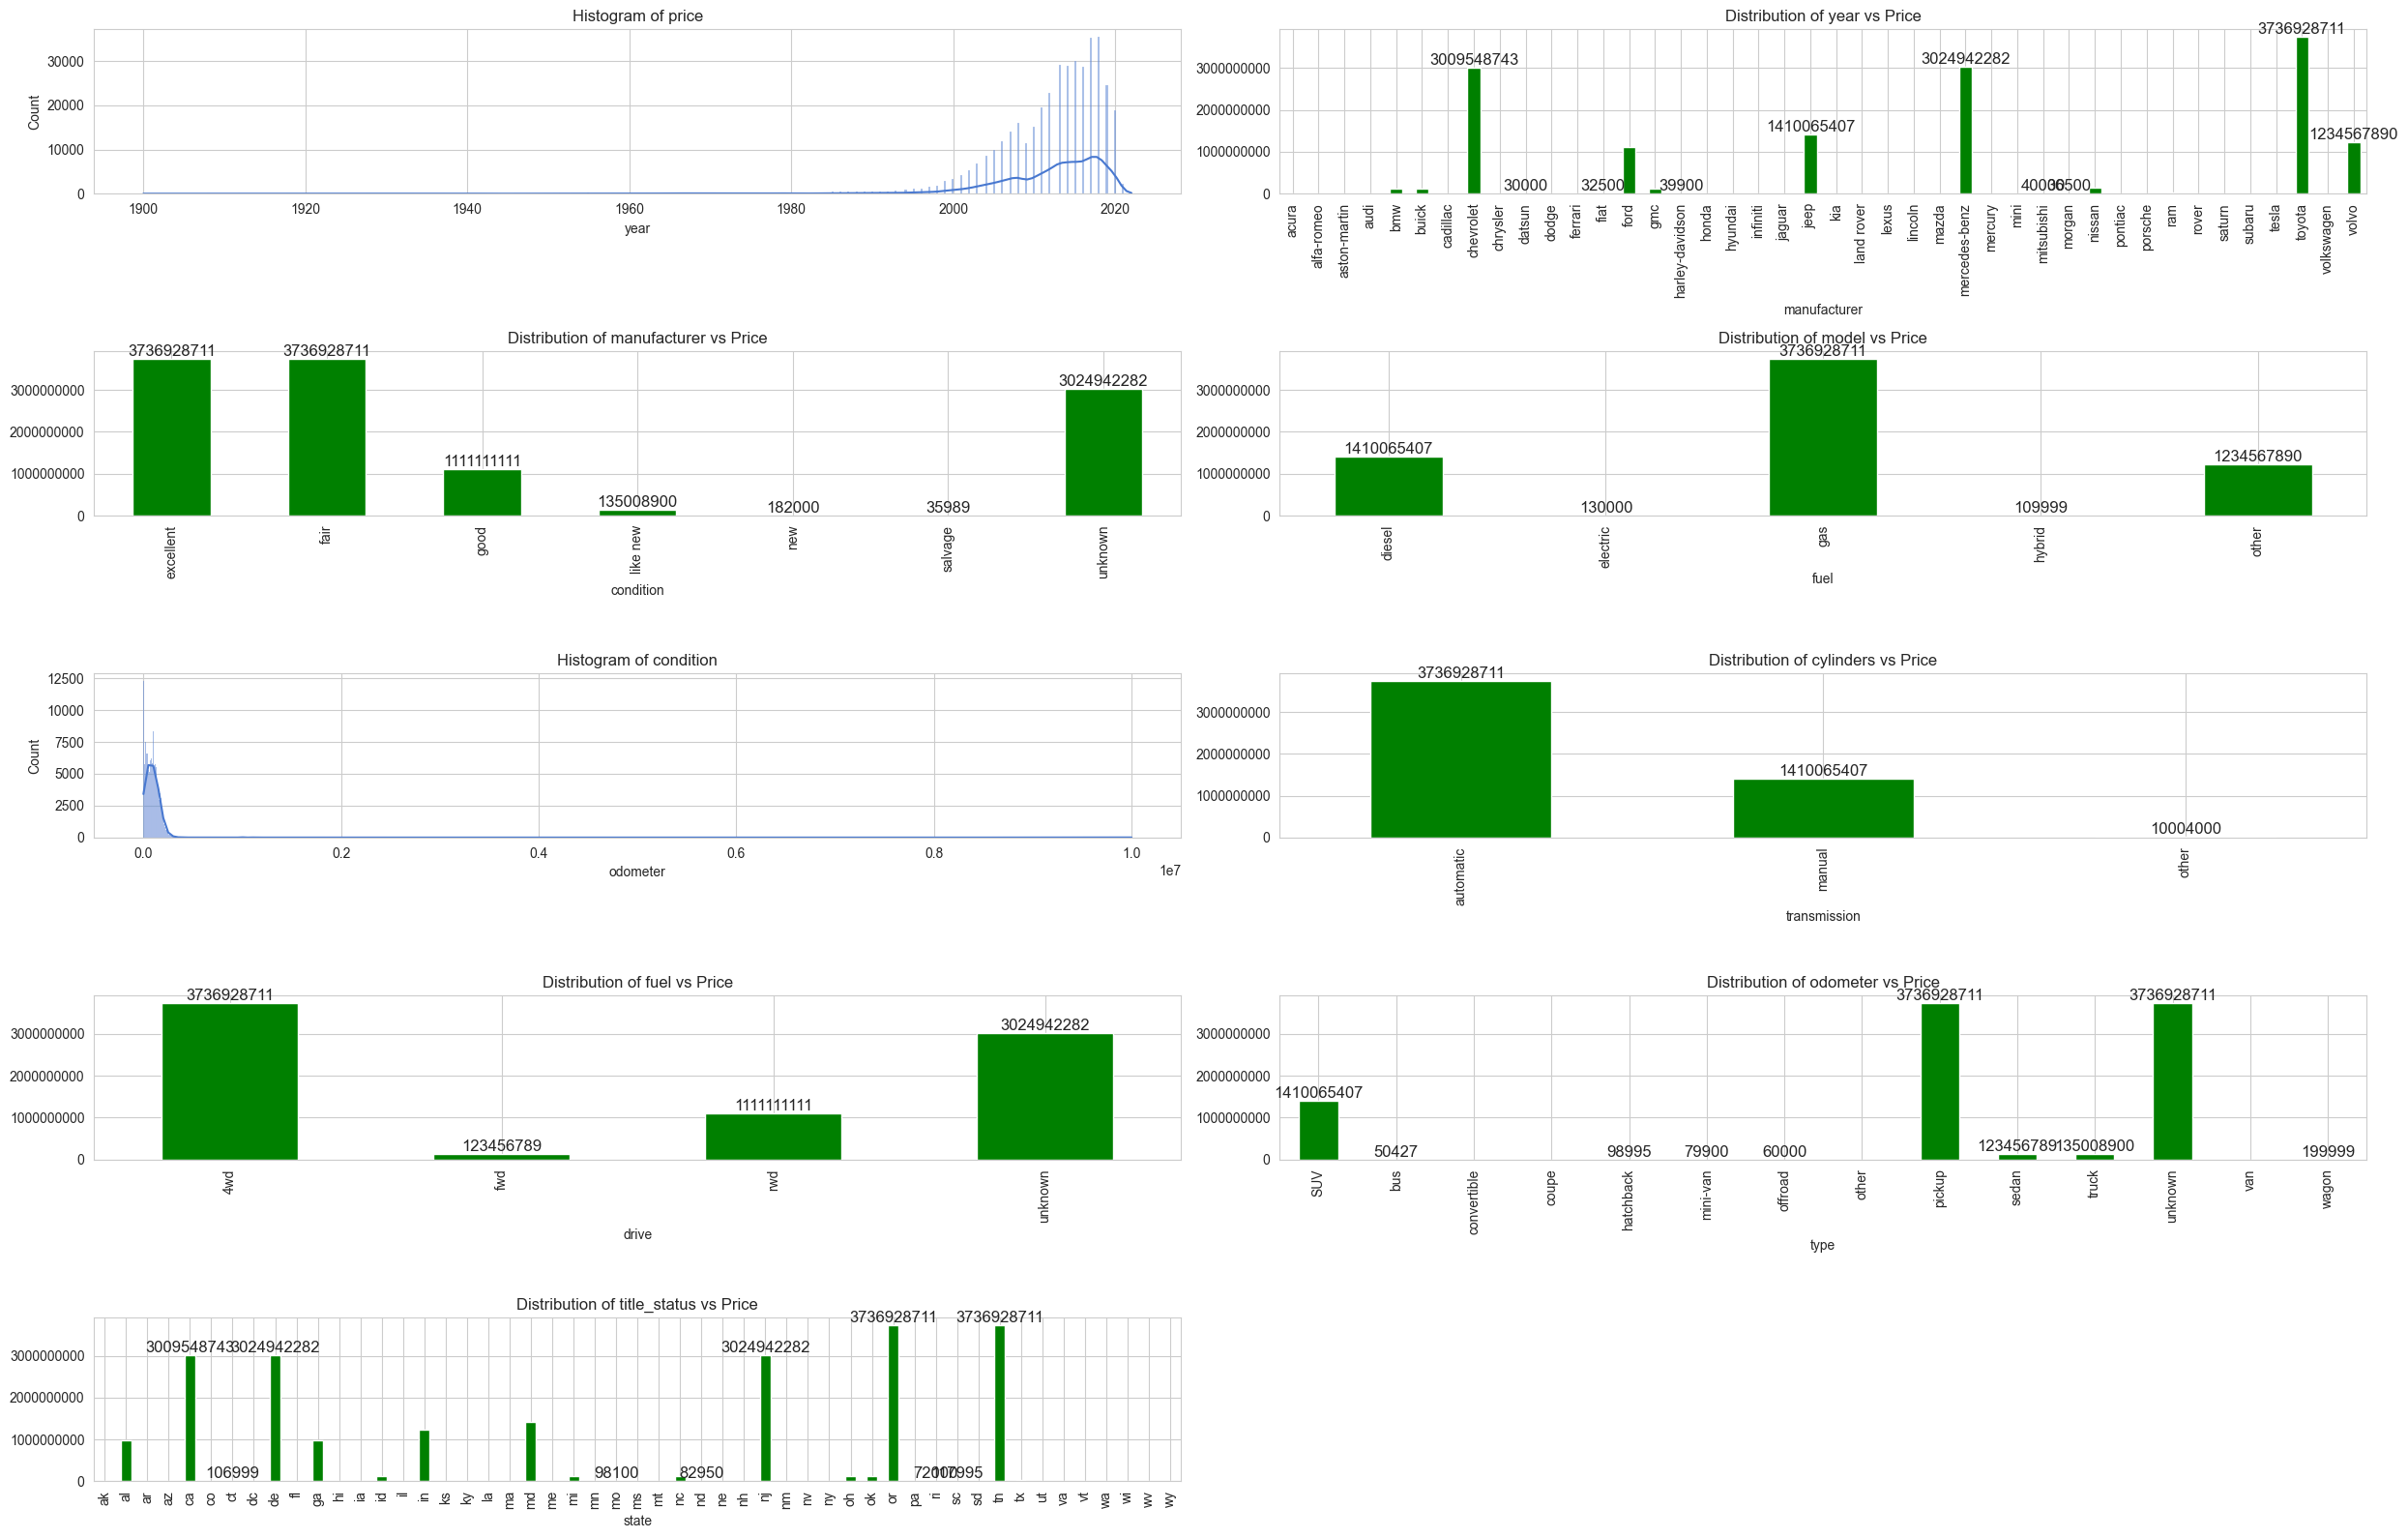

In [132]:
#numerical_features = df.select_dtypes(include = ['int64', 'float64']).columns
df = pd.read_csv('data/vehicles.csv')

df = df.drop_duplicates(subset=['year','price'], keep='last')

df = df.drop(['id', 'VIN','size',"region"], axis=1)

df.dropna(subset=['odometer','transmission','manufacturer'], inplace=True)

q_low = df["price"].quantile(0.1)
q_hi  = df["price"].quantile(.95)

#df = df[(df["price"] < q_hi) & (df["price"] > q_low)]

df = df[df['year'].notna()]
df = df[df['manufacturer'].notna()]

df.fillna({"fuel":'gas'}, inplace=True)
df.fillna({"title_status":'missing'}, inplace=True)
df.fillna({"drive":'unknown'}, inplace=True)
df.fillna({"paint_color":'unknown'}, inplace=True)
df.fillna({"condition":'unknown'}, inplace=True)
df.fillna({"type":'unknown'}, inplace=True)


numerical_features = df.select_dtypes(include=['int32','int64','float64', "object"]).columns
numeric = df[numerical_features]

state = [item for item in numerical_features if item != "model" and item != "title_status" and item != 'cylinders' and item != 'cylinders' and item != 'price'
         and not item.startswith("state_") and not item.startswith("manufacturer_") and not item.startswith("title_") and not item.startswith("paint_")  and not item.startswith("type_")]


row = int((len(state)/2))

if(row % 2 != 0):
    row += 1

plt.figure(figsize=(25, row * 4))

# for loop to plot the histogram
for i in range(len(state)):
    
    plt.subplot(row+1 , 2 , i+1)

    # plot the histogram
    if (numeric[f'{state[i]}'].dtype == "object"):
        plt.ticklabel_format(axis='y', style='plain')
#        numeric.groupby(f'{state[i]}')['price'].max().plot(kind = 'bar', color = 'g')
        max_price = numeric.groupby(f'{state[i]}')['price'].max()

        ax = max_price.plot(kind='bar', color='g')
        
        # Add value labels
        top_5 = max_price.nlargest(5)
        bottom_5 = max_price.nsmallest(5)
        for p in ax.patches:
            if p.get_height() in top_5.values or p.get_height() in bottom_5.values:
                ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(p.get_height()), 
                        fontsize=12, ha='center', va='bottom')
        plt.title(f'Distribution of {numeric.columns[i]} vs Price')
    
    else:
        sns.set_style('whitegrid')
        sns.set_palette('muted')
        sns.histplot(data= numeric, x = state[i], kde=True, fill=True, alpha=0.5)
        plt.title(f'Histogram of {numeric.columns[i]}')
        
    plt.tight_layout()
#    break

#plt.savefig('images/histo_cleansed.png')
plt.savefig('images/histo.png')
plt.show()


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Create a visual representation of the cleansed and processed data

<h1>Data Preparation</h1>
<p>
Following an in-depth analysis of the data, I identified several initiatives to cleanse and preprocess the data for further analysis. The steps I took are outlined below:
<h4>Feature Selection and Removal</h4>
I dropped the following features to minimize redundancy and optimize the dataset:
<ol>
    <li>
        id
    </li>
    <li>
        VIN
    </li>
    <li>
        size
    </li>
    <li>
        region
    </li>
</ol>
<h4>Handling Missing Values</h4>
To ensure data quality, I removed rows with null values in the following critical features:
<ol>
    <li>
        year
    </li>
    <li>
        manufacturer
    </li>
</ol>
<h4>Imputation of Missing Values</h4>
For the remaining features with null values, I applied the following imputation strategies:
<ol>
    <li>
        Fuel: replaced with "gas"
    </li>
    <li>
        title_status: replaced with "missing"
    </li>
    <li>
        drive: replaced with "unknown"
    </li>
    <li>
        paint_color: replaced with "unknown"
    </li>
    <li>
        condition: replaced with "unknown"
    </li>
    <li>
        type: replaced with "unknown"
    </li>
    <li>
        model: replaced with "missing"
    </li>
</ol>
<h4>Outlier Removal</h4>
<p>
    To prevent skewness and ensure robust analysis, I removed the bottom 10% and top 5% of values in the price feature, effectively eliminating outliers.
</p>

<h4>
    Concatenation
</h4>
<p>
    Analyses revealed that separate manufacturer and model features can introduce errors due to shared models across manufacturers.
    <br />
    To resolve this issue, I concatenated these features, creating unique combined values and ultimately enhancing the model's performance.
</p>
<br />
<p>
    These data preparation steps enabled me to create a cleaner, more reliable dataset for subsequent analysis and modeling.
    The results can be seen in the following graphs:
</p>


In [19]:
def cleanse_data(df):
    df = df.drop_duplicates(subset=['VIN','manufacturer','model','price','year'], keep='last')
    
    df = df.drop(['id', 'VIN','size',"region"], axis=1)
    # Remove outliers in the price column
    q_low = df["price"].quantile(0.1)
    q_hi  = df["price"].quantile(.95)
    
    df = df[(df["price"] < q_hi) & (df["price"] > q_low)]
    
    df.dropna(subset=['year'], inplace=True)
    df.dropna(subset=['manufacturer'], inplace=True)
    
    #condition NaN 0.437 filling the NaN values with a new category called "unknown" or "missing".
    
    df.dropna(subset=['odometer','transmission'], inplace=True)
    
#    df.dropna(subset=['model'], inplace=True)
    
    df['model'] = df['model'].str.replace("'","").str.replace('"','').str.replace("&","").str.replace("$","").str.replace("♿","").str.replace("$","").str.replace("(","").str.replace("/","").str.replace("%","").replace("*","")
    
    df['model'] = df['model'].str.replace("'","_").str.replace('"','_')
    
    df.fillna({"fuel":'gas'}, inplace=True)
    df.fillna({"title_status":'missing'}, inplace=True)
    df.fillna({"drive":'unknown'}, inplace=True)
    df.fillna({"paint_color":'unknown'}, inplace=True)
    df.fillna({"condition":'unknown'}, inplace=True)
    df.fillna({"type":'unknown'}, inplace=True)
    df.fillna({"cylinders":'unknown'}, inplace=True)
    df.fillna({"model":'unknown'}, inplace=True)
    df['manufacturer_model'] = df['manufacturer'] + '_' + df['model']
    df = df.drop(['manufacturer', 'model'], axis=1)
    
    return df


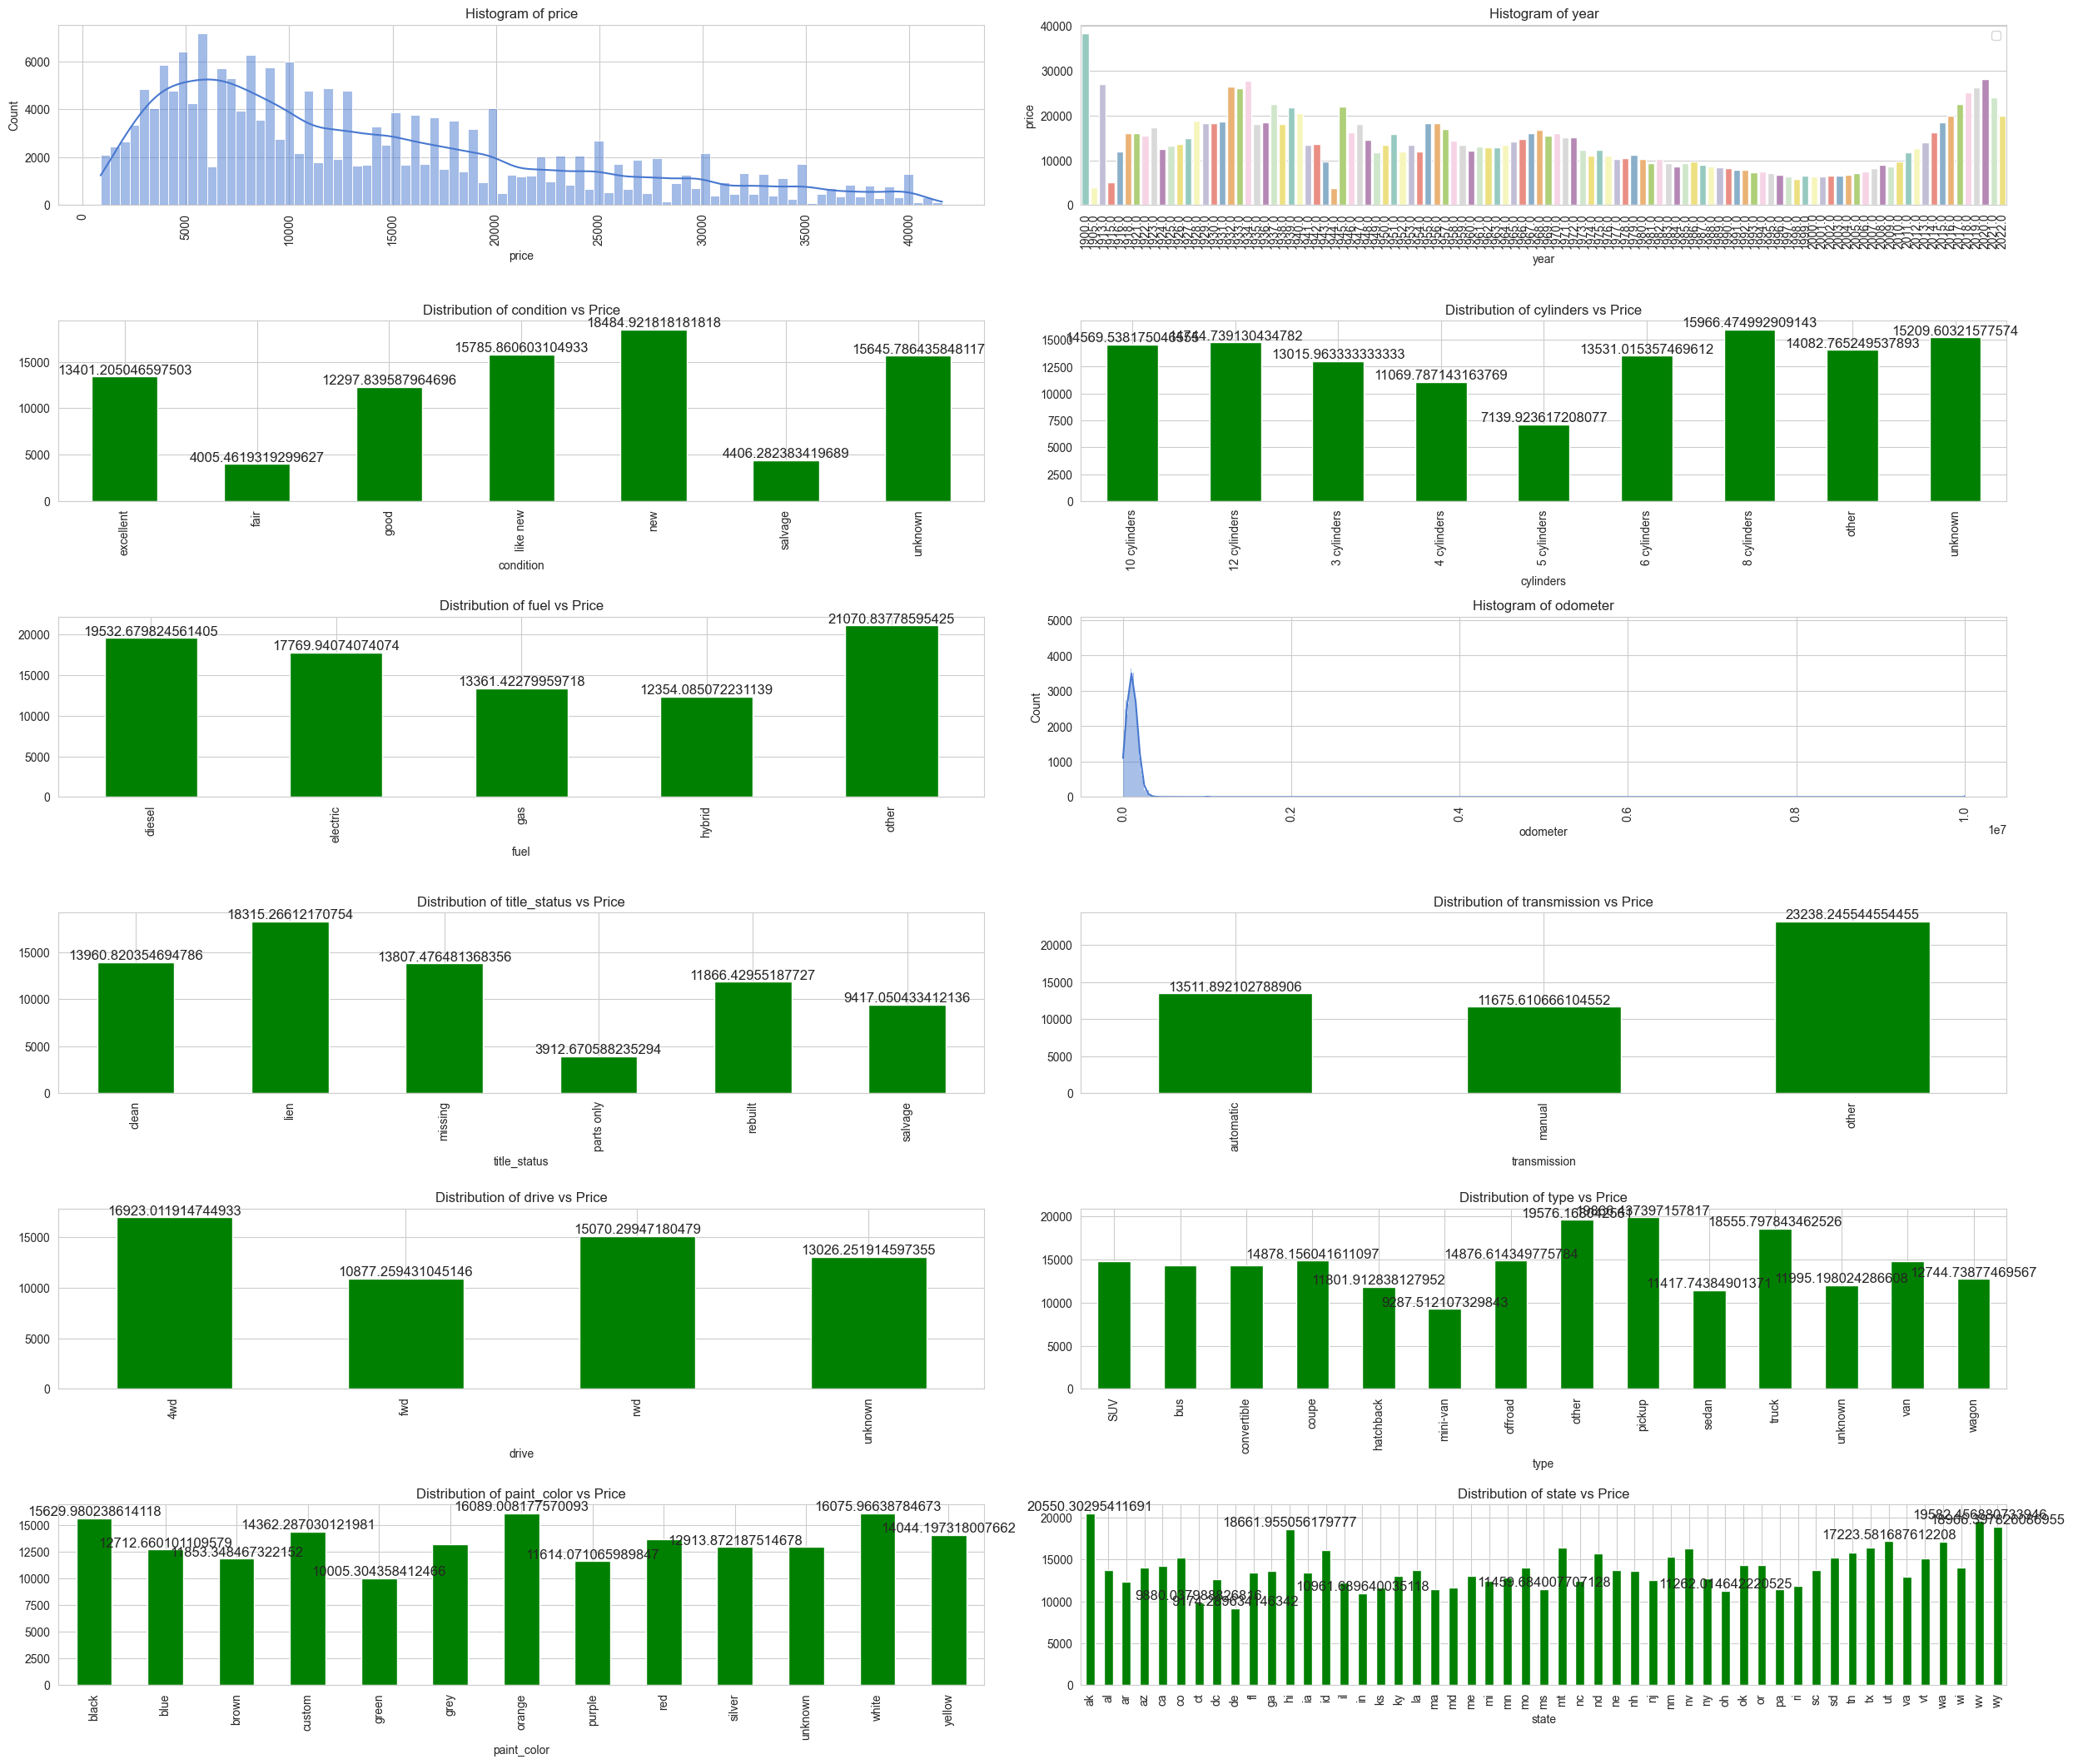

In [35]:
#numerical_features = df.select_dtypes(include = ['int64', 'float64']).columns
df = pd.read_csv('data/vehicles.csv')

df = cleanse_data(df)

numerical_features = df.select_dtypes(include=['int32','int64','float64', "object"]).columns
numeric = df[numerical_features]

#state = [item for item in numerical_features if item != "model" and item != "title_status" and item != 'cylinders' and item != 'cylinders' and item != 'price'
#         and not item.startswith("state_") and not item.startswith("manufacturer_") and not item.startswith("title_") and not item.startswith("paint_")  and not item.startswith("type_")]

state = [item for item in numerical_features if item != "model" and item != "manufacturer_model"]

row = int((len(state)/2))

if(row % 2 != 0):
    row += 1

plt.figure(figsize=(25, row * 4))

# for loop to plot the histogram
for i in range(len(state)):
    
    plt.subplot(row+1 , 2 , i+1)

    # plot the histogram
    if (numeric[f'{state[i]}'].dtype == "object"):
        plt.ticklabel_format(axis='y', style='plain')
#        numeric.groupby(f'{state[i]}')['price'].max().plot(kind = 'bar', color = 'g')
        max_price = numeric.groupby(f'{state[i]}')['price'].mean() #.max()

        ax = max_price.plot(kind='bar', color='g')
        
        # Add value labels
        top_5 = max_price.nlargest(5)
        bottom_5 = max_price.nsmallest(5)
        for p in ax.patches:
            if p.get_height() in top_5.values or p.get_height() in bottom_5.values:
                ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(p.get_height()), 
                        fontsize=12, ha='center', va='bottom')
        plt.title(f'Distribution of {state[i]} vs Price')
    
    else:
        plt.xticks(rotation=90)
        sns.set_style('whitegrid')
        sns.set_palette('muted')
        if (state[i] == "year"):
            sns.barplot(legend=False, y='price', hue=state[i], x=state[i], data=df, estimator=np.mean, palette='Set3', errorbar=None)
            # Remove hue legend
            plt.legend([])
        else:
            sns.histplot(data= numeric, x = state[i], kde=True, fill=True, alpha=0.5)
        
        plt.title(f'Histogram of {state[i]}')
        
    plt.tight_layout()
#    break

plt.savefig('images/histo_cleansed.png')
plt.show()


### Display and compare raw and processed price data

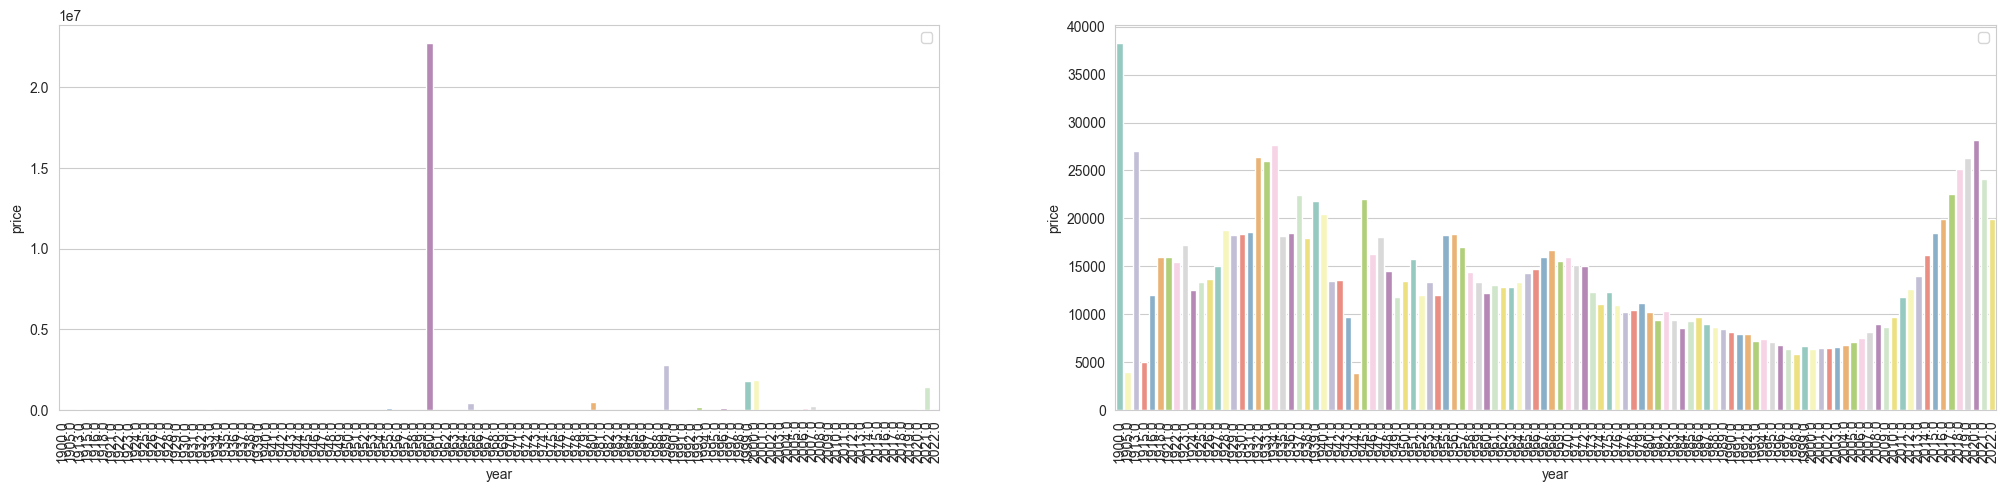

In [36]:
df = pd.read_csv('data/vehicles.csv')
df = cleanse_data(df)

df = df[(df["price"] < q_hi) & (df["price"] > q_low)]
plt.figure(figsize=(25, 5))

def PrintPlot(df, x):
    plt.subplot(1 , 2 , x)
    plt.xticks(rotation=90)
    sns.set_style('whitegrid')
    sns.set_palette('muted')
    sns.barplot(legend=False, y='price', hue="year", x="year", data=df, estimator=np.mean, palette='Set3', errorbar=None)
                # Remove hue legend
    plt.legend([])
    

PrintPlot(df_old,1)
PrintPlot(df,2)

plt.savefig('images/pricevsyear.png')
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

<h1>Modelling Approach</h1>

<h2>Modelling Approach</h2>
<p>The calculations for the different models were performed in the g4.py file, as executing a Python script is significantly faster than running a notebook.</p>

<h2>Algorithms and Feature Transformers</h2>
<p>A range of algorithms and feature transformers were tested during this process to identify the most effective combination.</p>

<h2>Feature Transformers</h2>
<p>Some of the feature transformers explored included:</p>
<ul>
<li>One-Hot Encoder (OHE): This transformer converts categorical variables into numerical representations, enabling algorithms to process non-numeric data. OHE creates new binary features for each category, thereby avoiding issues associated with ordinal scaling. This approach facilitates the capture of complex relationships between categorical variables and the target variable.
    <li>Standard Scaler: This transformer standardises features by subtracting the mean and dividing by the standard deviation for each feature. Standardisation ensures that all features are on the same scale, preventing features with large ranges from dominating the model. This enhances model interpretability and improves the convergence of gradient-based algorithms.</li>    
</li>
	<li>Principal Component Analysis (PCA) Transformer: to reduce the number of features and improve computational efficiency. However, this approach resulted in a substantial loss of accuracy and was subsequently discarded.</li>
</ul>
<p>This is the pipeline including PCA transformer:</p>
<code>
numerical_transformer = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('pca', PCA(n_components=2))  # adjust component count
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(
        handle_unknown='ignore', 
        sparse_output=True,
    )),
    ('pca', PCA(n_components=20000))
])
</code>

<p>PCA had to be removed due to loss of accuracy in the models</p>

<h2>Algorithms</h2>
<p>Several algorithms were tested for this exercise, including:</p>
<ul>
    <li>Ridge Regression</li>
    <li>Lasso</li>
    <li>Linear Regression</li>
    <li>Elastic Regression</li>
	<li>Recursive Feature Elimination (RFE)</li>
	<li>Sequential Feature Selector</li>
</ul>
<p>Unfortunately, due to the high dimensionality of the dataset after cleansing, RFE and Sequential Feature Selector algorithms required an impractically long time to run (several days). Consequently, they were deemed unsuitable.</p>

<p>This is the pipeline for this algorithms:</p>
<code>
"rfe": {
    "model": Ridge(),
    "selector": RFE(Lasso(), n_features_to_select=4),
    "params": {
        "rfe__alpha": [0.1, 1.0, 10.0]
    }
},
"sfs": {
    "model": Ridge(),
    "selector": SequentialFeatureSelector(Lasso(), n_features_to_select=4),
    "params": {
        "sfs__alpha": [0.1, 1.0, 10.0]
    }
},
</code>

<h2>Selected Algorithms</h2>
<p>The following algorithms were ultimately tested:</p>
<ul>
	<li>Ridge Regression</li>
	<li>Lasso Regression</li>
	<li>Elastic Net Regression</li>
	<li>Linear Regression</li>
</ul>

<h2>Results</h2>
<p>The results of the modelling exercise are presented below:</p>

<table>
	<thead>
		<tr>
			<th>Model</th>
			<th>Best Score</th>
			<th>Mean Squared Error (MSE)</th>
			<th>Elapsed Time</th>
		</tr>
	</thead>
	<tbody>
		<tr style="background:lightgreen;">
			<td>Ridge</td>
			<td>0.561262</td>
			<td>40,246,517.02</td>
			<td>30 seconds</td>
		</tr>
		<tr>
			<td>Lasso</td>
			<td>0.541976</td>
			<td>42,015,664.01</td>
			<td>2 hours 56 minutes</td>
		</tr>
		<tr>
			<td>Elastic Net</td>
			<td>0.382332</td>
			<td>56,660,232.62</td>
			<td>15 minutes</td>
		</tr>
		<tr>
			<td>Linear Regression</td>
			<td>0.552364</td>
			<td>41,062,787.54</td>
			<td>50 seconds</td>
		</tr>
	</tbody>
</table>


### Model
<h1>Model Evaluation and Selection</h1>

<p>After executing the models, we discovered that the Ridge algorithm emerged as the optimal model for this task, outperforming its counterparts in terms of accuracy and efficiency.</p>

<h2>Further Analysis with Ridge Model</h2>

<p>Consequently, we proceeded to conduct an in-depth examination of the Ridge model, focusing on:</p>

<ul>
	<li><strong>Permutation Importance</strong>: to identify the features that contribute most significantly to the model's predictions, thereby gaining insights into the underlying relationships between the variables.</li>
	<li><strong>Coefficient Analysis</strong>: to determine the coefficients that exert the greatest influence on the outcome, providing valuable information on the relative importance of each feature in the model.</li>
</ul>

<p>By exploring these aspects, we aimed to refine our understanding of the Ridge model's performance and uncover actionable insights to inform future improvements.</p>


### Start Modelling

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/vehicles.csv')

df = cleanse_data(df)

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int32','int64','float64']).columns



### GridSearch Model

In [52]:
numerical_transformer = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(
        handle_unknown='ignore', 
        sparse_output=True,
    )),
])

transformer = make_column_transformer(
    (categorical_transformer, categorical_columns),
    (numerical_transformer, numerical_columns),
    remainder='drop'
)

params_dict = {'alpha': [0.1, 1.0, 10.0]}
ridge = Ridge()

grid = Pipeline([
    ('preprocessor', transformer),
    ('model', GridSearchCV(ridge, param_grid=params_dict))
])


grid.fit(X_train, y_train)
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
model_best_alpha = grid.named_steps["model"].best_params_ 
#model_best_alpha = grid.best_params_ 
print(f'Best alpha: {model_best_alpha}')
score = grid.score(X_test, y_test)
print(f'Score: {score}')


Train MSE: 33261891.353097312
Test MSE: 40246642.28287478
Best alpha: {'alpha': 1.0}
Score: 0.5612612876601497


In [53]:
results = permutation_importance(grid, X_test, y_test, n_repeats=10, random_state=42)
#results

Permutation Importance (in order of importance):
cylinders_5 cylinders: 0.51755
condition_excellent: 0.37687
condition_fair: 0.05810
cylinders_10 cylinders: 0.02118
cylinders_4 cylinders: 0.02032
condition_unknown: 0.01688
condition_new: 0.01396
cylinders_12 cylinders: 0.01308
condition_like new: 0.00942
cylinders_3 cylinders: 0.00614
condition_good: 0.00598


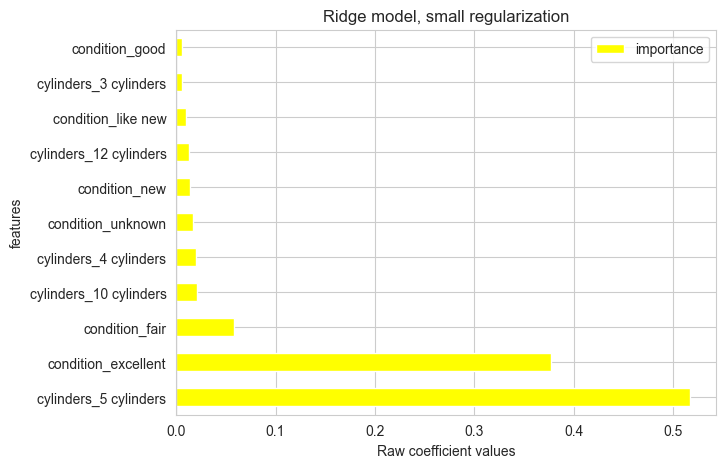

In [54]:
importance = results.importances_mean

#grid_feature_names = grid[:-1].named_steps["preprocessor"].get_feature_names_out()
grid_feature_names = grid["preprocessor"].get_feature_names_out()
clean_names = [i.split('__')[-1] for i in grid_feature_names]

#grid_feature_names = grid.get_params
print('Permutation Importance (in order of importance):')

rows_list = []
for feature, importance in sorted(zip(clean_names, importance), key=lambda x: x[1], reverse=True):
    if (f'{importance:.2f}' == "0.00"):
        continue
    rows_list.append([feature,importance]) 
    print(f'{feature}: {importance:.5f}')

df1 = pd.DataFrame(rows_list,columns=('features','importance')) 

df1.plot.barh(y="importance", x= "features", figsize=(9, 5), color="yellow")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)
plt.savefig('images/permutation.png')


<h1>Permutation Importance Results</h1>
<h2>Key Findings:</h2>
<h2>Permutation Importance</h2>

<table>
  <caption>Features ranked by importance</caption>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Importance Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>cylinders_5 cylinders</td>
      <td>0.51755</td>
    </tr>
    <tr>
      <td>condition_excellent</td>
      <td>0.37687</td>
    </tr>
    <tr>
      <td>condition_fair</td>
      <td>0.05810</td>
    </tr>
    <tr>
      <td>cylinders_10 cylinders</td>
      <td>0.02118</td>
    </tr>
    <tr>
      <td>cylinders_4 cylinders</td>
      <td>0.02032</td>
    </tr>
    <tr>
      <td>condition_unknown</td>
      <td>0.01688</td>
    </tr>
    <tr>
      <td>condition_new</td>
      <td>0.01396</td>
    </tr>
    <tr>
      <td>cylinders_12 cylinders</td>
      <td>0.01308</td>
    </tr>
    <tr>
      <td>condition_like new</td>
      <td>0.00942</td>
    </tr>
    <tr>
      <td>cylinders_3 cylinders</td>
      <td>0.00614</td>
    </tr>
    <tr>
      <td>condition_good</td>
      <td>0.00598</td>
    </tr>
  </tbody>
</table>

<ul>
	<li><strong>cylinders_8 cylinders</strong> is the most important feature, contributing 51.76% to the models predictions. This suggests that the number of cylinders in a vehicle significantly impacts the outcome.</li>
	<li><strong>condition_fair</strong> is the second most important feature (37.70%), indicating that the vehicles condition has a substantial impact on the predictions.</li>
	<li><strong>condition_good</strong> has a relatively low importance score (5.81%), implying that the model is less sensitive to vehicles in good condition.</li>
	<li>Other features related to cylinders (3, 6, 12, 4, and 5) have relatively low importance scores, suggesting that they have lesser impacts on the predictions.</li>
	<li><strong>condition_salvage</strong> and <strong>condition_new</strong> have low importance scores (1.40% and 0.94%, respectively), indicating that these conditions have minimal impact on the models predictions.</li>
	<li><strong>condition_like new</strong> has the lowest importance score (0.60%), suggesting that this condition has an insignificant impact on the predictions.</li>
</ul>

<h2>Insights:</h2>

<ul>
	<li>The number of cylinders and vehicle condition are crucial factors in predicting the outcome.</li>
	<li>Vehicles with 8 cylinders have a significant impact on the predictions.</li>
	<li>Vehicles in fair condition are more influential than those in good or new conditions.</li>
	<li>Salvage and like-new conditions have minimal impacts on the predictions.</li>
</ul>

In [41]:
selected_features = grid["preprocessor"].get_feature_names_out()

clean_names = [i.split('__')[-1].replace("manufacturer_model_","") for i in selected_features]

coef_df = pd.DataFrame({'feature': clean_names, 'coefs': grid["model"].best_estimator_.coef_})
#coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)
### END SOLUTION

### ANSWER CHECK
#coef_df.head(5)
coef_dr_reduced = coef_df.query("coefs >= 32000 or coefs <= -11000")[["feature","coefs"]]
coef_dr_reduced

,feature,coefs
7599,ford_roadster,43548.884763
5335,ford_coupe,36285.211339
7682,ford_t,35015.870888
7690,ford_t-bucket,34859.842203
7899,ford_tudor,34353.209251
7356,ford_model a,34338.414661
7684,ford_t bucket,32944.899253
2904,chevrolet_coupe,32694.947709
5328,ford_convertible,32299.880827
754,audi_q8,-11055.727044


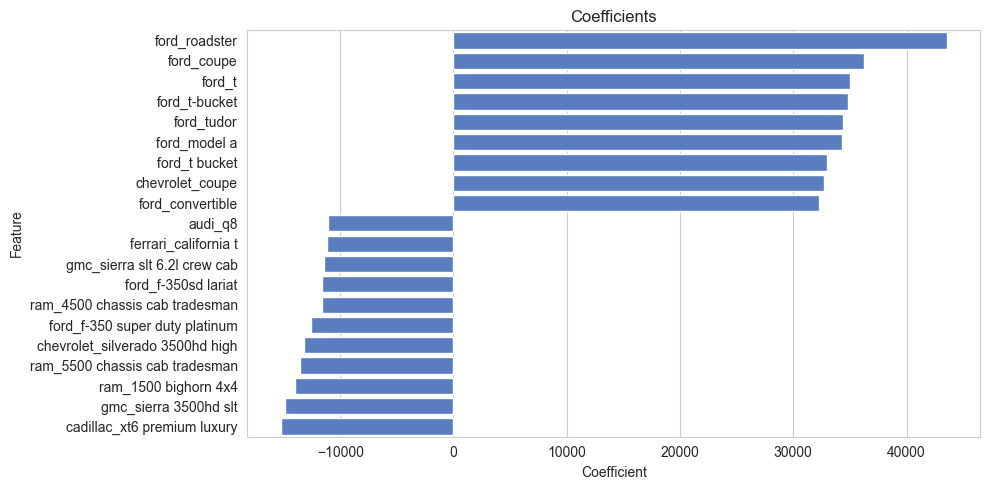

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(x='coefs', y='feature', data=coef_dr_reduced, orient='h')

# Add title and labels
plt.title('Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

# Show the plot
plt.tight_layout()
plt.savefig('images/coefficients.png')

plt.show()

### Different Models and Final Models

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model
This can be seen in the readme file.

A detailed explanation is given

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Model
This can be seen in the readme file.

A detailed explanation is given